In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector   
from pandas import DataFrame
import re
import numpy as np

In [153]:
 cnx = mysql.connector.connect(user='root', password='',
                              host='192.168.100.59',
                              database='preferences')

try:
   cursor = cnx.cursor()
   cursor.execute("""
      SELECT *     
    FROM 
        PASSENGERS
  
   """)
   result = cursor.fetchall()
 
finally:
    cnx.close()

In [5]:
passengers = DataFrame(result)

In [6]:
passengers = passengers.rename(columns={ \
    0:'ID', 
    1: 'USER_ID',
    2:'PASSENGER',
    3:'ORGANIZATION_ID',
    4:'GROUP_REQUEST_ID',
    5:'EMAIL',
    6:'SEX',
    7:'PHONENUMBER',
    8:'BIRTHDAY' ,
    9:'SCHOOLBOY',
    10:'MARKETING',
    11:'PARAMEDIC',
    12:'FIRSTNAME',
    13:'MIDDLENAME',
    14: 'LASTNAME',
    15: 'DOCUMENTS',
    16: 'CREATED_AT'                                   
  })

In [13]:
passengers

,ID,USER_ID,PASSENGER,ORGANIZATION_ID,GROUP_REQUEST_ID,EMAIL,SEX,PHONENUMBER,BIRTHDAY,SCHOOLBOY,MARKETING,PARAMEDIC,FIRSTNAME,MIDDLENAME,LASTNAME,DOCUMENTS,CREATED_AT,age
0,159,10,"{""sex"":""Female"",""birthdate"":""21.05.1988"",""user...",None,None,,None,None,NaT,0,0,0,None,None,None,None,2021-04-12 16:21:52,NaN
1,160,10,"{""sex"":""Male"",""birthdate"":""01.01.1990"",""userDo...",None,None,,None,None,NaT,0,0,0,None,None,None,None,2021-04-12 16:21:52,NaN
2,161,1,"{""sex"":""Male"",""birthdate"":""26.03.1988"",""userDo...",None,None,,None,None,NaT,0,0,0,None,None,None,None,2021-04-12 16:21:52,NaN
3,163,10,"{""sex"":""Male"",""birthdate"":""11.11.1930"",""userDo...",None,None,,None,None,NaT,0,0,0,None,None,None,None,2021-04-12 16:21:52,NaN
4,164,10,"{""sex"":""Male"",""birthdate"":""11.11.1930"",""userDo...",None,None,,None,None,NaT,0,0,0,None,None,None,None,2021-04-12 16:21:52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2959,458,"{""userAirLineBonusCards"":[],""passengerCards"":[...",None,None,a.plokhih@mediasoft.team,M,+79001234567,1995-04-10,0,0,0,None,None,None,None,2021-04-20 12:22:16,26.0
1532,2960,476,"{""userAirLineBonusCards"":[],""passengerCards"":[...",None,None,fedorovamg@oooinex.ru,F,+79087776655,1991-01-01,0,0,0,None,None,None,None,2021-04-23 13:34:12,30.0
1533,2961,353,"{""userAirLineBonusCards"":[],""passengerCards"":[...",None,None,testovaalex@yandex.ru,F,+79111111112,1959-06-17,0,0,0,None,None,None,None,2021-05-13 19:52:24,62.0
1534,2962,482,"{""userAirLineBonusCards"":[],""passengerCards"":[...",None,None,e.likhachev@gateline.ru,M,+79773572787,1955-01-01,0,0,0,None,None,None,None,2021-05-18 14:01:00,66.0


In [ ]:
# считаем распределение полов среди пассажиров
sex_distribution = passengers.groupby('SEX').agg({'SEX':'count'}).rename(columns = {'SEX':'count'})
# считаем кол-во пассажиров, у которых пол не определен
sex_undefined =  passengers.SEX.isnull().sum()

In [108]:
sex_distribution

,count
SEX,
F,215
M,527


In [107]:
sex_undefined

794

In [8]:
#считам описательные статистики относительно возраста

passengers.BIRTHDAY = pd.to_datetime(passengers.BIRTHDAY)
now = pd.to_datetime('now')
passengers['age'] = (now - passengers.BIRTHDAY).astype('<m8[Y]') 
passengers_age = passengers.dropna(subset=['age'])
passengers_age.age.describe()

count    742.000000
mean      30.002695
std       18.328241
min        0.000000
25%       20.000000
50%       31.000000
75%       40.000000
max      119.000000
Name: age, dtype: float64

In [11]:
#записываем в файл датафрейм passengers_age
passengers_age.to_csv('passengers_age.csv')

In [152]:
#распределение почтовых доменов пассажиров в %
passengers['mail_domain'] = passengers.EMAIL.str.extract('@([\w.]+)')
pass_domain = passengers['mail_domain']\
    .value_counts(normalize=True, dropna=False)\
    .head(10)\
    .mul(100)\
    .round(1)\
    .to_frame('percent_domain')\
    .reset_index()

pass_domain= pass_domain.rename(columns ={'index':'domain'})
pass_domain

,domain,percent_domain
0,NaN,51.8
1,gateline.ru,16.7
2,mail.ru,7.6
3,gmail.com,7.3
4,yandex.ru,5.3
5,firste.ml,1.2
6,oooinex.ru,1.0
7,adramail.com,1.0
8,inbox.ru,0.8
9,mail3.top,0.6


<AxesSubplot:xlabel='domain', ylabel='percent_domain'>

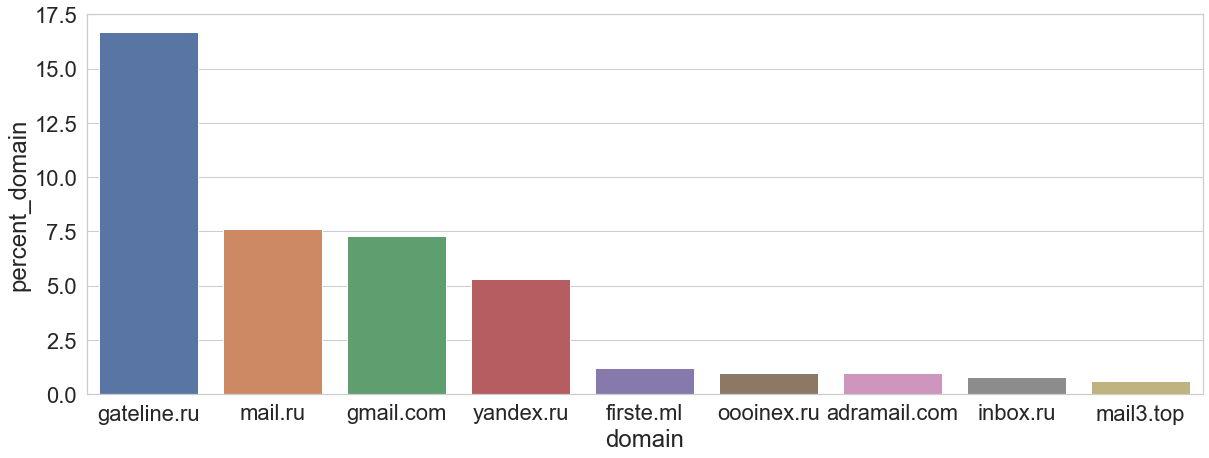

In [151]:
sns.barplot(data = pass_domain, y = 'percent_domain', x = 'domain')